In [1]:
#Change to the location where data files are stored

C:\Users\singh\OneDrive\Documents\MastersAppliedAIDeakin\SIT720_Machine_Learning\Assignment2


#### 1. Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify your findings.

Applying PCA to reduce the dimensionality of the data. We can also see that the majority of variance is explained by starting 10 components.

In [2]:
import pandas as pd
df_scadi = pd.read_csv("SCADI-Dataset/SCADI.csv")
df_scadi_crop = df_scadi.iloc[:,2:205]
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
#from sklearn.preprocessing import normalize
#df_scadi_scaled = normalize(df_scadi_crop)
pca = PCA(n_components = 40)
pcaVals = pca.fit_transform(df_scadi_crop)
df_scadi_crop.head()
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


[0.26846044 0.14943145 0.08608256 0.05368216 0.0469112  0.0388722
 0.03389651 0.03343418 0.02669304 0.0241101  0.02104131 0.01866936
 0.01643959 0.01498528 0.01386048 0.01254776 0.01139207 0.01074923
 0.0102154  0.00973814 0.0079949  0.00758833 0.00720519 0.00662489
 0.00594053 0.00534907 0.00527504 0.00468095 0.00431945 0.00415813
 0.00379937 0.00321287 0.00301922 0.00297864 0.00273994 0.00232489
 0.00218539 0.00204203 0.00181849 0.00169602]
0.9861658055567868


C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


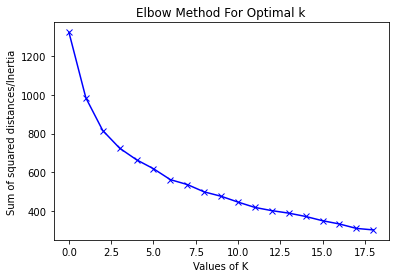

In [3]:
#elbow method to find optimum clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(pcaVals)
 sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

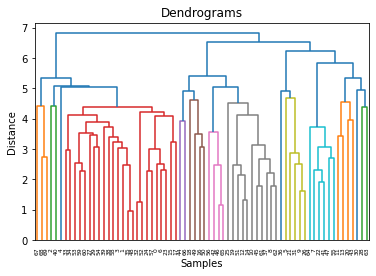

[1 1 1 1 1 3 1 4 2 3 2 0 2 0 2 1 5 1 5 2 0 3 4 1 1 2 3 1 0 1 0 3 1 1 1 1 3
 2 1 1 1 4 2 0 5 2 2 4 1 5 5 2 1 1 1 4 2 1 1 1 1 2 2 0 4 2 5 1 1 1]


In [4]:
#exploring AgglomerativeClustering and PCA plots method to see if the subgroups can be attained
import scipy.cluster.hierarchy as shc
plt.title("Dendrograms")  
plt.xlabel("Samples")  
plt.ylabel("Distance")  
dend = shc.dendrogram(shc.linkage(pcaVals, method='average'))
plt.show()
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average').fit(pcaVals)
print(clustering.labels_)

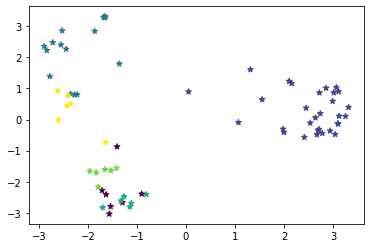

In [5]:
plt.scatter(pcaVals[:,0],pcaVals[:,1],c=clustering.labels_,
marker='*')
plt.show()

#### 2. Is this data facing curse of dimensionality? If so, then how to solve this problem. Explain with a two-dimensional plot and report relevant loss of information.

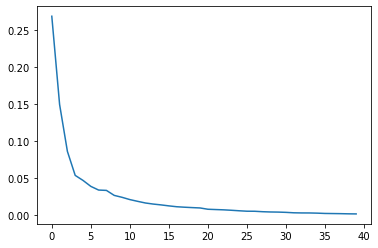

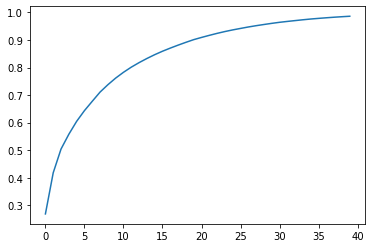

         Age
Classes     
class1     2
class2     7
class3     1
class4    12
class5     3
class6    29
class7    16


In [6]:
#Plotting graph to show loss of information and dimensionality curse
plt.plot(pca.explained_variance_ratio_)
plt.show()
var_sum = 0
var_sum_list = []
for var_ in pca.explained_variance_ratio_:
    var_sum = var_sum + var_
    var_sum_list.append(var_sum)
plt.plot(var_sum_list)
plt.show()
print(df_scadi[["Classes", "Age"]].groupby(["Classes"]).count())

#### 3. After applying principal component analysis (PCA) on a given dataset, it was found that the percentage of variance for the first N components is X%. How is this percentage of variance computed?

In [7]:
sum(pca.explained_variance_ratio_)

0.9861658055567868

#### 4. Create a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. Explain your results based on following criteria: <br>
a. What model have you selected for solving this problem and why? <br>
b. Have you made any assumption for the target variable? If so, then why? <br>
c. What have you done with text variables? Explain. <br>
d. Have you optimised any model parameters? What is the benefit of this action? <br>
e. Have you applied any step for handling overfitting or underfitting issue? What is that? <br>

In [8]:
df_obesity = pd.read_csv("obesity_levels.csv")
print(df_obesity.head())
df_obesity_label = df_obesity.loc[:, df_obesity.columns == 'NObeyesdad']
df_obesity_nolabel = df_obesity.loc[:, (df_obesity.columns != 'NObeyesdad') & (df_obesity.columns != 'Weight')]

#One hot encoding of text variables

df_obesity_categorical= df_obesity_nolabel.select_dtypes(include='object')
encoded_text_df = pd.get_dummies(df_obesity_categorical)

#dropping cols that are encoded
df_obesity_nolabel = df_obesity_nolabel.drop(df_obesity_categorical, axis=1)

#joining cols that are encoded
df_obesity_nolabel = pd.concat([df_obesity_nolabel, encoded_text_df], axis=1)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

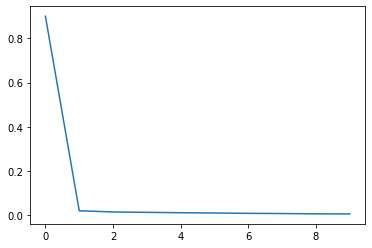

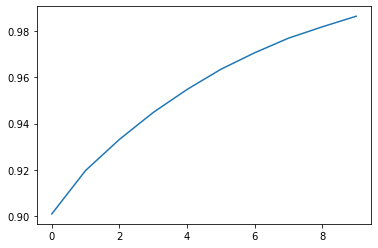

array([0.9008274 , 0.01883384, 0.01346647, 0.01169035, 0.00995989,
       0.0087513 , 0.00716058, 0.00633352, 0.00491165, 0.00458084])

In [9]:
#Applying PCA

pca_obesity = PCA(n_components = 10)
pcaVals_obesity = pca_obesity.fit_transform(df_obesity_nolabel)
plt.plot(pca_obesity.explained_variance_ratio_)
plt.show()
var_sum = 0
var_sum_list = []
for var_ in pca_obesity.explained_variance_ratio_:
    var_sum = var_sum + var_
    var_sum_list.append(var_sum)
plt.plot(var_sum_list)
plt.show()
sum(pca_obesity.explained_variance_ratio_)
pca_obesity.explained_variance_ratio_

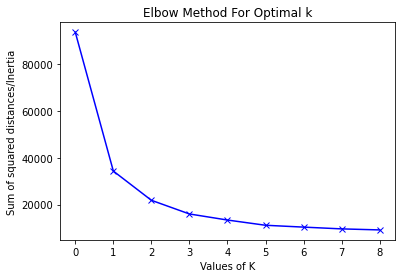

In [10]:
#Elbow method to find optimum clusters

dist = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 clustering = kmeans.fit(pcaVals_obesity)
 dist.append(kmeans.inertia_)
plt.plot(dist,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 5. Create a ML model for classifying subjects into two classes applying following constraints on above dataset. <br>
• Use “NObeyesdad” as target variable and rest of them as predictor variables.<br>
• drop samples with value “Insufficient Weight” for “NObeyesdad”<br>
• Group Normal Weight, Overweight Level I, and Overweight Level II into a class, and the other three labels (Obesity Type I, II, III) as the other class.

In [11]:
df_obesity_binary = df_obesity[df_obesity["NObeyesdad"] != "Insufficient_Weight"].copy()
print(df_obesity_binary.shape)
print(df_obesity.shape)
df_obesity_binary['NObeyesdad'].replace('Normal_Weight', 0, inplace=True)
df_obesity_binary['NObeyesdad'].replace('Overweight_Level_I', 0, inplace=True)
df_obesity_binary['NObeyesdad'].replace('Overweight_Level_II', 0, inplace=True)

df_obesity_binary['NObeyesdad'].replace('Obesity_Type_I', 1, inplace=True)
df_obesity_binary['NObeyesdad'].replace('Obesity_Type_II', 1, inplace=True)
df_obesity_binary['NObeyesdad'].replace('Obesity_Type_III', 1, inplace=True)

df_obesity_binary_label = df_obesity_binary.loc[:, df_obesity_binary.columns == 'NObeyesdad']
df_obesity_binary = df_obesity_binary.loc[:, df_obesity_binary.columns != 'NObeyesdad']
print(df_obesity_binary.head())

(1839, 17)
(2111, 17)
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transport

In [12]:
#One hot encoding

df_obesity_binary_categorical = df_obesity_binary.select_dtypes(include='object')
encoded_text_df = pd.get_dummies(df_obesity_binary_categorical)

#dropping cols that are encoded
df_obesity_binary_encoded = df_obesity_binary.drop(df_obesity_binary_categorical, axis=1)

#joining cols that are encoded
df_obesity_binary_encoded = pd.concat([df_obesity_binary_encoded, encoded_text_df], axis=1)
df_obesity_binary_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


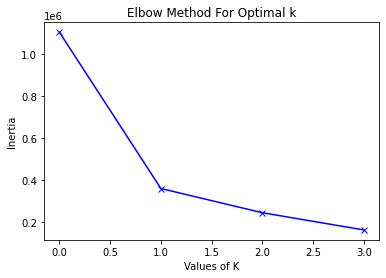

[2 2 1 ... 3 3 3]


In [13]:
dist = []
K = range(1,5)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 clustering = kmeans.fit(df_obesity_binary_encoded)
 dist.append(kmeans.inertia_)
plt.plot(dist,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()
print(clustering.labels_)

#### Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification.

In [14]:
#Model 1: Using Kmeans on complete data
kmeans = KMeans(n_clusters=2)

clustering = kmeans.fit(df_obesity_binary_encoded)
print(clustering.labels_)
from kmodes.kmodes import KModes
from sklearn import metrics
s_score = metrics.silhouette_score(df_obesity_binary_encoded, clustering.labels_, metric='euclidean')
r_score = metrics.rand_score(df_obesity_binary_label["NObeyesdad"].to_list(), clustering.labels_)
ar_score = metrics.adjusted_rand_score(df_obesity_binary_label["NObeyesdad"].to_list(), clustering.labels_)

print("silhoutte score for kmeans: ", s_score)
print("rand score for kmeans: ", r_score)
print("adjusted rand score for kmeans: ", ar_score)

[0 0 0 ... 1 1 1]
silhoutte score for kmeans:  0.5712224623932787
rand score for kmeans:  0.7892477164755175
adjusted rand score for kmeans:  0.5784766969326518


In [15]:
#Model 2: Using Kmeans on PCA optimized data

pca_obesity_binary = PCA(n_components = 2)
pcaVals_obesity_binary = pca_obesity_binary.fit_transform(df_obesity_binary_encoded)

kmeans = KMeans(n_clusters=2)

clustering = kmeans.fit(pcaVals_obesity_binary)
print(clustering.labels_)
from kmodes.kmodes import KModes
from sklearn import metrics
s_score = metrics.silhouette_score(df_obesity_binary_encoded, clustering.labels_, metric='euclidean')
r_score = metrics.rand_score(df_obesity_binary_label["NObeyesdad"].to_list(), clustering.labels_)
ar_score = metrics.adjusted_rand_score(df_obesity_binary_label["NObeyesdad"].to_list(), clustering.labels_)

print("silhoutte score for kmeans: ", s_score)
print("rand score for kmeans: ", r_score)
print("adjusted rand score for kmeans: ", ar_score)
print(pcaVals_obesity_binary.shape)

[1 1 1 ... 0 0 0]
silhoutte score for kmeans:  0.5712224623932787
rand score for kmeans:  0.7892477164755175
adjusted rand score for kmeans:  0.5784766969326518
(1839, 2)


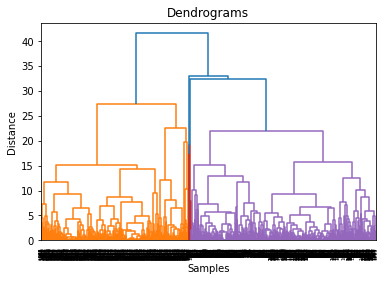

In [16]:
#Model 3: Using Kmeans on AgglomerativeClustering 

import scipy.cluster.hierarchy as shc
plt.title("Dendrograms")  
plt.xlabel("Samples")  
plt.ylabel("Distance")  
dend = shc.dendrogram(shc.linkage(pcaVals_obesity_binary, method='average'))
plt.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(pcaVals_obesity_binary)
print(clustering.labels_)

[0 0 0 ... 1 1 1]


#### 6. Suppose that a company has a number (>=500) of resorts around the globe. <br>
a. Identify a list of features (>=5) that can be used to describe these resorts.<br>
b. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically or collecting from similar datasets. Submit your created dataset. In addition, please provide links in case you have collected the dataset.

In [23]:
df_hotels = pd.read_csv("expedia-hotel-recommendations/train.csv", nrows=2000)
print(df_hotels.shape)
df_hotels.drop_duplicates(inplace = True)
df_hotels = df_hotels.dropna()
print(df_hotels.shape)
df_hotels.info()

(2000, 24)
(1036, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1994
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  1036 non-null   object 
 1   site_name                  1036 non-null   int64  
 2   posa_continent             1036 non-null   int64  
 3   user_location_country      1036 non-null   int64  
 4   user_location_region       1036 non-null   int64  
 5   user_location_city         1036 non-null   int64  
 6   orig_destination_distance  1036 non-null   float64
 7   user_id                    1036 non-null   int64  
 8   is_mobile                  1036 non-null   int64  
 9   is_package                 1036 non-null   int64  
 10  channel                    1036 non-null   int64  
 11  srch_ci                    1036 non-null   object 
 12  srch_co                    1036 non-null   object 
 13  srch_adults_cnt           

(2000, 24)
(1036, 24)


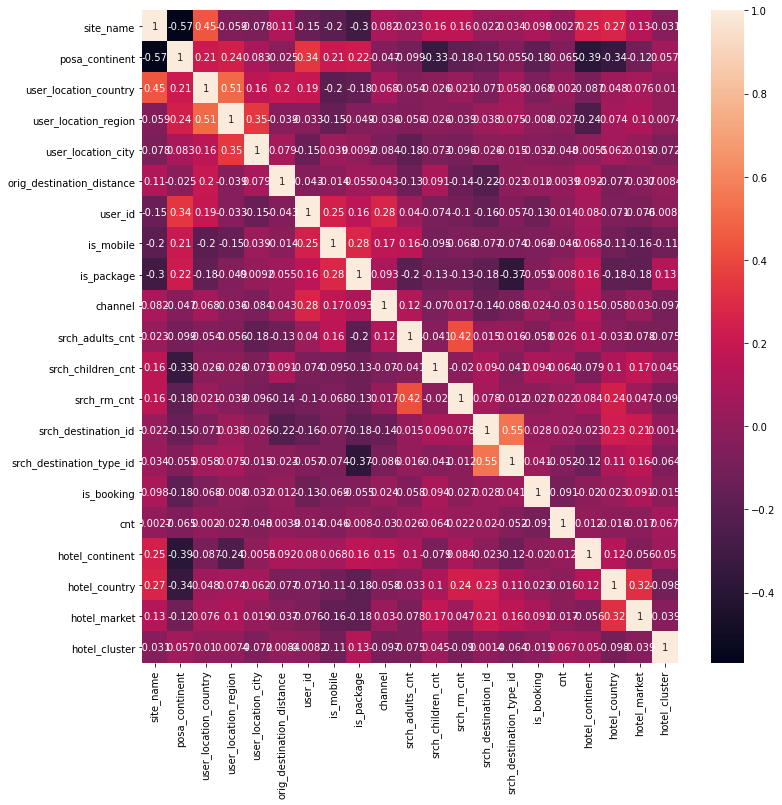

In [18]:


import seaborn as sns

corrMatrix = df_hotels.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### c. Build a ML model that can help a customer to select appropriate set of resorts based on the season of travel. Present and describe the performance of your model.

C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


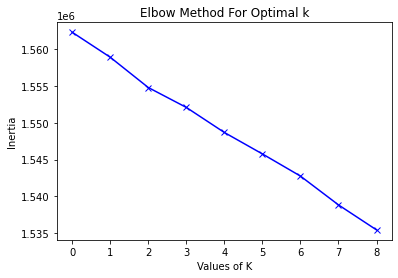

[1 1 1 ... 1 1 1]


In [19]:
from scipy import stats
df_hotels_encoded = pd.get_dummies(df_hotels, columns=['date_time','srch_ci','srch_co'])
df_hotels_encoded_std = stats.zscore(df_hotels_encoded)
pca_hotels = PCA(n_components = 10)
pcaVals_hotels = pca_hotels.fit_transform(df_hotels_encoded_std)
sum(pca_obesity.explained_variance_ratio_)
dist = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 clustering = kmeans.fit(df_hotels_encoded_std)
 dist.append(kmeans.inertia_)
plt.plot(dist,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()
print(clustering.labels_)



[-0.024771261552610183,
 -0.032982715612098,
 -0.016833106355466726,
 -0.044689931550569356,
 -0.04863612944698339,
 -0.037204175544936,
 -0.048580281049873934,
 -0.05513181431688952,
 -0.04550770732133695,
 -0.05357745136522348,
 -0.0443774483979449,
 -0.05073437303387434,
 -0.050240185922441234,
 -0.050036852823454915,
 -0.04715490337423408,
 -0.04765500473794177,
 -0.047047665747848445,
 -0.04493173554019133,
 -0.0459750387474442,
 -0.04487120377915685,
 -0.043623749729050885,
 -0.04108423521482146,
 -0.0422275719579509,
 -0.041753687894852745,
 -0.03807417597810657,
 -0.039488555888974895,
 -0.037860522761828524,
 -0.038687670272477284,
 -0.037635294304613424,
 -0.03718548639957084,
 -0.03623404688306022,
 -0.03696891269929579,
 -0.03401414653740578,
 -0.03305382797495922,
 -0.03463938552440208,
 -0.03313588162968535,
 -0.03238355465810198,
 -0.032328386153384965,
 -0.030947043265674365,
 -0.030318358731417853,
 -0.02853338588696646,
 -0.028008468325523506,
 -0.027416583053759123,


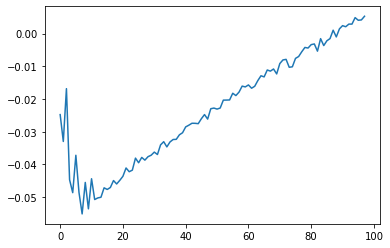

In [21]:
K = range(2,100)
sscore_list = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 clustering = kmeans.fit(df_hotels_encoded_std)
 s_score = metrics.silhouette_score(df_hotels_encoded_std, clustering.labels_, metric='euclidean')
 sscore_list.append(s_score)

plt.plot(sscore_list)
#sscore_list